# Градиентное обучение спайковых нейронных сетей
Задача - обучить спайковую нейросеть распознавать жесты из датасета DVS128 Gesture. 

## Задание
* Скачайте датасет IBM DVS Gesture (см. Tutorial 7 по snnTorch)
* Из данных оставьте три класса: arm roll, hand clap, air drums
* Реализуйте сверточную спайковую нейросеть (см. Tutorial 6)  
* Выберите функцию ошибки и обучите нейросеть
* Оцените качество классификации

## References

[1] https://snntorch.readthedocs.io/en/latest/tutorials/index.html

In [1]:
from PIL import __version__
print(__version__)

8.4.0


In [2]:
#!pip uninstall pillow -y
#!pip install "pillow<7"

In [3]:
#!conda install -c anaconda pillow<7

In [4]:
#from PIL import pillow_version

ImportError: cannot import name 'pillow_version' from 'PIL' (D:\Anaconda3\lib\site-packages\PIL\__init__.py)

In [5]:
import tonic

In [57]:
#!pip install -U git+https://github.com/pytorch/vision

  Cloning https://github.com/pytorch/vision to /private/var/folders/zn/n2d2qpcj7qb1lmqnh250v_6w0000gn/T/pip-req-build-38fkjbfa
  Running command git clone --filter=blob:none --quiet https://github.com/pytorch/vision /private/var/folders/zn/n2d2qpcj7qb1lmqnh250v_6w0000gn/T/pip-req-build-38fkjbfa
  Resolved https://github.com/pytorch/vision to commit 029cb3fe4526084172c30be14278d46ecd5bf17c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torchvision: filename=torchvision-0.15.0a0+029cb3f-cp39-cp39-macosx_10_9_x86_64.whl size=914397 sha256=742a9733d3aa2256a35a25941a28df7a16687e453f6971a50883bd30b148cf89
  Stored in directory: /private/var/folders/zn/n2d2qpcj7qb1lmqnh250v_6w0000gn/T/pip-ephem-wheel-cache-w6ktkq69/wheels/a1/a6/7e/edfdebb65555669d499613be6e982b6e66c56ee6e8bbc8b1de
Successfully built torchvision
  Attempting uninstall: torchvision
    Found existing installation: torchvi

In [6]:
 import spikingjelly

In [7]:
!pip list | grep torch

"grep" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [8]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.linear_model import *
import spikingjelly
import time
import sklearn
from spikingjelly.clock_driven import neuron
from spikingjelly import visualizing
import numpy as np
from torch.utils.data import DataLoader
from tonic import DiskCachedDataset

In [9]:
import snntorch as snn
from snntorch import surrogate
from snntorch import backprop
from snntorch import functional as SF
from snntorch import utils
from snntorch import spikeplot as splt

# Скачайте датасет IBM DVS Gesture (см. Tutorial 7 по snnTorch)

In [16]:
!pwd

/Users/mac-julia/Documents/neuromorf_mipt/hw4


In [19]:
!ls

DvsGesture
Homework_4_Gradient_learning_Smolkina.ipynb
cache
data
gesture_mapping.csv


In [10]:
%%time
dataset = tonic.datasets.DVSGesture(save_to='./data', train=True)
#events, target = dataset[0]

Wall time: 209 ms


In [11]:
dataset

DVSGesture

In [19]:
dataset.data

['./data/DVSGesture/ibmGestureTrain/user01_fluorescent/5.npy',
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/4.npy',
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/6.npy',
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/7.npy',
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/3.npy',
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/2.npy',
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/0.npy',
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/1.npy',
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/9.npy',
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/8.npy',
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/10.npy',
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent_led/5.npy',
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent_led/4.npy',
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent_led/6.npy',
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent_led/7.npy',
 './data/DVSGesture/ibmGestureTrain/us

In [20]:
dataset.targets

[5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7,
 3,
 2,
 0,
 1,
 9,
 8,
 10,
 5,
 4,
 6,
 7

# Изучение данных 

In [23]:
import tonic.transforms as transforms

sensor_size = tonic.datasets.DVSGesture.sensor_size
frame_transform = transforms.ToFrame(sensor_size=sensor_size, n_time_bins=3)

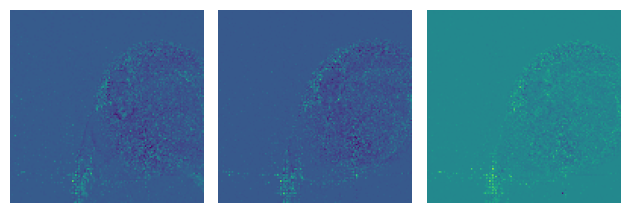

In [143]:
tonic.utils.plot_event_grid(events)

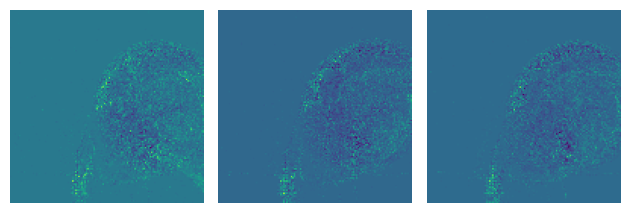

In [144]:
denoise_transform = tonic.transforms.Denoise(filter_time=10000)

events_denoised = denoise_transform(events)
frames_denoised = frame_transform(events_denoised)

plot_frames(frames_denoised)

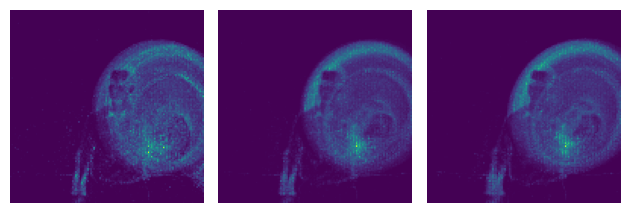

In [145]:
volume = transforms.ToVoxelGrid(sensor_size=sensor_size, n_time_bins=3)(events_denoised)

fig, axes = plt.subplots(1, len(volume))
for axis, slice in zip(axes, volume):
    axis.imshow(slice[0])
    axis.axis("off")
plt.tight_layout()

In [27]:
!pwd

/Users/mac-julia/Documents/neuromorf_mipt/hw4


0


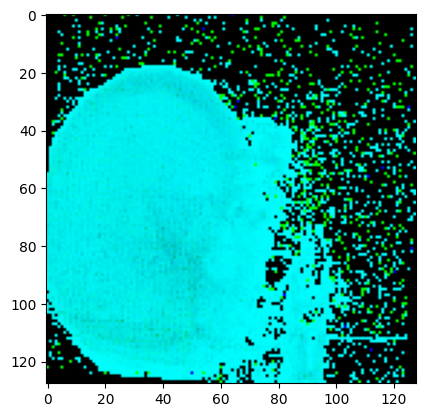

1


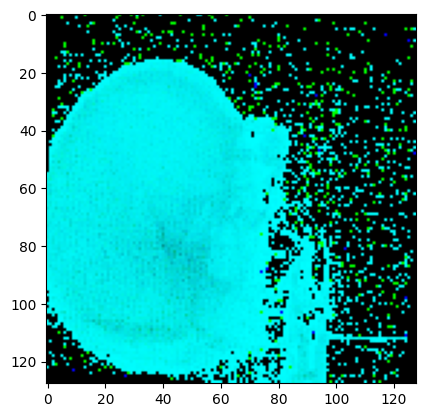

2


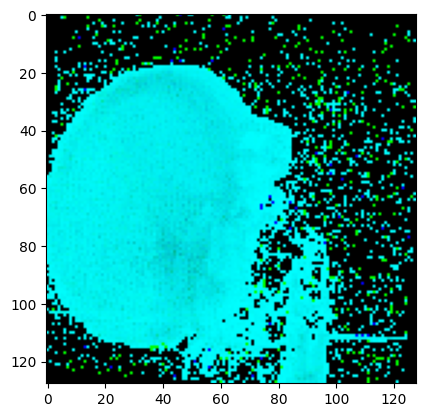

In [222]:
from torchvision import transforms
from matplotlib import pyplot as plt

x, y = cached_trainset[1]
to_img = transforms.ToPILImage()

img_tensor = torch.zeros([x.shape[0], 3, x.shape[2], x.shape[3]])
img_tensor[:, 1] = x[:, 0]
img_tensor[:, 2] = x[:, 1]


for t in range(img_tensor.shape[0]):
    print(t)
    plt.imshow(to_img(img_tensor[t]))
    plt.pause(0.01)

# Из данных составьте три класса: arm roll, hand clap, air drums

In [29]:
import csv
with open('gesture_mapping.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        print(', '.join(row))

action,label
hand_clapping,1
right_hand_wave,2
left_hand_wave,3
right_hand_clockwise, ,4
right_hand_counter_clockwise, ,5
left_hand_clockwise, ,6
left_hand_counter_clockwise, ,7
forearm_roll_forward,8
forearm_roll_backward,8
drums,9
guitar,10
random_other_gestures,11


Мы хоти всего 3 класса, в данном случаe сномерами :8 ,1, 9

In [12]:
dict_data = dict(zip(dataset.data, dataset.targets))

In [31]:
dict_data 

{'./data/DVSGesture/ibmGestureTrain/user01_fluorescent/5.npy': 5,
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/4.npy': 4,
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/6.npy': 6,
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/7.npy': 7,
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/3.npy': 3,
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/2.npy': 2,
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/0.npy': 0,
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/1.npy': 1,
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/9.npy': 9,
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/8.npy': 8,
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent/10.npy': 10,
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent_led/5.npy': 5,
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent_led/4.npy': 4,
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent_led/6.npy': 6,
 './data/DVSGesture/ibmGestureTrain/user01_fluorescent_led/7.n

In [13]:
key_to_delete = []
for key in dict_data.keys():
    if (dict_data[key] != 8 and  dict_data[key] != 1 and dict_data[key] != 9):
        print(dict_data[key])
        key_to_delete.append(key)
    else: # renaming targets
        if dict_data[key] == 8:
            dict_data[key] = 0
        if dict_data[key] == 9:
            dict_data[key] = 2

0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7
0
10
2
3
4
5
6
7

In [14]:
for i in key_to_delete:
    dict_data.pop(i)

In [15]:
data = list(dict_data.keys())
type(data)

list

In [16]:
targets = list(dict_data.values())
targets

[1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,


In [17]:
import pandas as pd
import seaborn as sns

In [18]:
dff = pd.DataFrame(targets, columns=['targets'])

res = dff['targets'].value_counts().to_frame().reset_index().sort_values('index')

# renaming the columns
res.columns = ['targets', 'Count']

display(res)

,targets,Count
1,0,98
0,1,98
2,2,98


In [19]:
len(targets)

294

In [20]:
len(data)

294

# Реализуйте сверточную спайковую нейросеть (см. Tutorial 6)

In [25]:
!rm -r /tmp/

"rm" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [28]:
%%time
train_data = tonic.datasets.DVSGesture(save_to='./data/train', train=True)
#test_data = tonic.datasets.DVSGesture(save_to='./data/test', train=False)

Wall time: 340 ms


In [27]:
test_data = tonic.datasets.DVSGesture(save_to='./data/test', train=False)

In [34]:
import torch
import torchvision
import tonic.transforms as transforms

In [35]:
sensor_size = tonic.datasets.DVSGesture.sensor_size
target_size = (32, 32, 2)
frame_transform = tonic.transforms.Compose([transforms.CenterCrop(sensor_size, target_size),
                                      transforms.Denoise(filter_time=10),
                                      transforms.ToFrame(sensor_size=target_size,
                                                         time_window=10)])

train_data.transform = frame_transform
test_data.transform = frame_transform

In [36]:
transform = tonic.transforms.Compose([torch.from_numpy,
                                      torchvision.transforms.RandomRotation([-10, 10])])

cached_train = DiskCachedDataset(train_data, transform=transform, cache_path='./cache/train')

cached_test = DiskCachedDataset(test_data, cache_path='./cache/test')

batch_size = 32
trainloader = DataLoader(cached_train, batch_size=batch_size, collate_fn=tonic.collation.PadTensors(batch_first=False))
testloader = DataLoader(cached_test, batch_size=batch_size, collate_fn=tonic.collation.PadTensors(batch_first=False))

In [ ]:
#!rm -r cache

In [247]:
for x,  x_len in trainloader:
    print(f'x.shape= [N, T, C, H, W]={tuple(x.shape)}')
    print(f'x_len= {x_len}')
    mask = padded_sequence_mask(x_len)
    print(f'mask = {mask.t().int()}')
    print(f'x_len = {len(x_len)}')
    print(f'x = {len(x)}')
    break

x.shape= [N, T, C, H, W]=(3, 128, 2, 128, 128)
x_len= tensor([ 2,  2,  9,  7,  0,  4,  0,  9,  2,  5,  6,  4,  4,  6,  4,  4,  4,  8,
         7, 10,  1,  4,  6,  5,  2,  8,  3, 10, 10,  5,  2,  3,  8,  7,  7,  0,
         3,  3, 10,  3,  5,  7, 10,  7,  7,  9,  8,  3, 10,  8,  8,  1,  2, 10,
         1,  9,  4,  4,  2,  8,  0,  7,  1,  8,  1,  0,  4,  5,  9,  6,  7,  3,
         9,  4,  3,  7,  8,  9,  2,  1,  5,  2,  4,  2,  9,  2,  6,  7,  9, 10,
         2,  0,  1,  8,  0,  2,  3,  3, 10,  7,  0,  1,  0,  9,  5, 10,  0,  7,
         1,  4, 10,  7, 10,  2,  6,  8,  7,  9, 10,  9,  2,  0,  1,  7,  1,  3,
         6,  1])
mask = tensor([[1, 1, 0,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32)
x_len = 128
x = 3


# Инициализация модели

In [39]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

spike_grad = surrogate.atan()
beta = 0.5

model = nn.Sequential(nn.Conv2d(2, 32, 10),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Conv2d(32, 64, 10),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Flatten(),
                    nn.Linear(64*5*5, 3),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True, output=True)
                    ).to(device)

In [40]:
def forward_pass(model, data):
  spk_rec = []
  utils.reset(model)

  for step in range(data.size(0)):
      spk_out, mem_out = model(data[step])
      spk_rec.append(spk_out)

  return torch.stack(spk_rec)

In [ ]:
# #optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# optimizer = optim.SGD([
#                {'params': model.base.parameters()},
#                {'params': model.classifier.parameters(), 'lr': 1e-3}
#            ], lr=1e-2, momentum=0.9)

In [41]:
optimizer = torch.optim.Adam(model.parameters(), lr=2e-2, betas=(0.9, 0.999))
loss_fn = SF.mse_count_loss(correct_rate=0.8, incorrect_rate=0.2)

# Выберите функцию ошибки и обучите нейросеть

In [42]:
num_epochs = 45

In [51]:
def iter(data, targets,trainloader,model):
     for data, targets in trainloader:
        data = data.to(device)
        targets = targets.to(device)

        model.train()
        spk_rec = forward_pass(model, data)
        loss_val = loss_fn(spk_rec, targets)

        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()

        train_loss += loss_val.item()
        train_acc += SF.accuracy_rate(spk_rec, targets)
        train_iters += 1


In [52]:
%%time
#ADAM
for epoch in range(num_epochs):
    train_iters = 0
    train_acc = 0
    train_loss = 0
    iter(data, targets,trainloader,model)
    eval_iters = 0
    eval_acc = 0
    with torch.no_grad():
        model.eval()
        for data, targets in testloader:
            data = data.to(device)
            targets = targets.to(device)
            spk_rec = forward_pass(model, data)
            eval_acc += SF.accuracy_rate(spk_rec, targets)
            eval_iters += 1
    print(f"Epoch {epoch+1}")
    print(f"Train Loss: {train_loss/train_iters:.2f} Train Accuracy: {train_acc/train_iters:.2f}")
    print(f"Eval Accuracy: {eval_acc/eval_iters:.2f}\n")

MemoryError: Unable to allocate 1.89 GiB for an array with shape (494974, 2, 32, 32) and data type int16

In [49]:
optimizer =  torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# optimizer = torch.optim.SGD([
#                {'params': model.base.parameters()},
#                {'params': model.classifier.parameters(), 'lr': 1e-3}
#            ], lr=1e-2, momentum=0.9)

In [50]:
%%time
#optim.SGD
for epoch in range(num_epochs):
    train_iters = 0
    train_acc = 0
    train_loss = 0
    iter(data, targets,trainloader,model)
    eval_iters = 0
    eval_acc = 0
    with torch.no_grad():
        model.eval()
        for data, targets in testloader:
            data = data.to(device)
            targets = targets.to(device)
            spk_rec = forward_pass(model, data)
            eval_acc += SF.accuracy_rate(spk_rec, targets)
            eval_iters += 1
    print(f"Epoch {epoch+1}")
    print(f"Train Loss: {train_loss/train_iters:.2f} Train Accuracy: {train_acc/train_iters:.2f}")
    print(f"Eval Accuracy: {eval_acc/eval_iters:.2f}\n")

RuntimeError: [enforce fail at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 6082240512 bytes.

In [232]:
from snntorch import surrogate

# network parameters
num_inputs = 28*28
num_hidden = 128
num_outputs = 10
num_steps = 1

# spiking neuron parameters
beta = 0.9  # neuron decay rate 
grad = surrogate.fast_sigmoid()

In [233]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(num_inputs, num_hidden),
                    snn.Leaky(beta=beta, spike_grad=grad, init_hidden=True),
                    nn.Linear(num_hidden, num_outputs),
                    snn.Leaky(beta=beta, spike_grad=grad, init_hidden=True, output=True)
                    ).to(device)

In [234]:
pop_outputs = 500

net_pop = nn.Sequential(nn.Flatten(),
                        nn.Linear(num_inputs, num_hidden),
                        snn.Leaky(beta=beta, spike_grad=grad, init_hidden=True),
                        nn.Linear(num_hidden, pop_outputs),
                        snn.Leaky(beta=beta, spike_grad=grad, init_hidden=True, output=True)
                        ).to(device)

In [235]:
optimizer = torch.optim.Adam(net.parameters(), lr=2e-3, betas=(0.9, 0.999))
loss_fn = SF.mse_count_loss(correct_rate=1.0, incorrect_rate=0.0)

In [236]:
from snntorch import utils

def test_accuracy(data_loader, net, num_steps, population_code=False, num_classes=False):
  with torch.no_grad():
    total = 0
    acc = 0
    net.eval()

    data_loader = iter(data_loader)
    for data, targets in data_loader:
      data = data.to(device)
      targets = targets.to(device)
      utils.reset(net)
      spk_rec, _ = net(data)

      if population_code:
        acc += SF.accuracy_rate(spk_rec.unsqueeze(0), targets, population_code=True, num_classes=10) * spk_rec.size(1)
      else:
        acc += SF.accuracy_rate(spk_rec.unsqueeze(0), targets) * spk_rec.size(1)
        
      total += spk_rec.size(1)

  return acc/total

In [237]:
from snntorch import backprop

num_epochs = 5

# training loop
for epoch in range(num_epochs):

    avg_loss = backprop.BPTT(net, train_loader, num_steps=num_steps,
                          optimizer=optimizer, criterion=loss_fn, time_var=False, device=device)
    
    print(f"Epoch: {epoch}")
    print(f"Test set accuracy: {test_accuracy(test_loader, net, num_steps)*100:.3f}%\n")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x4194304 and 784x128)

In [183]:
# Define Network
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # Initialize layers
        self.conv1 = nn.Conv2d(1, 12, 5)
        self.lif1 = snn.Leaky(beta=beta, spike_grad=spike_grad)
        self.conv2 = nn.Conv2d(12, 64, 5)
        self.lif2 = snn.Leaky(beta=beta, spike_grad=spike_grad)
        self.fc1 = nn.Linear(64*4*4, 10)
        self.lif3 = snn.Leaky(beta=beta, spike_grad=spike_grad)

    def forward(self, x):

        # Initialize hidden states and outputs at t=0
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky() 
        mem3 = self.lif3.init_leaky()

        # Record the final layer
        spk3_rec = []
        mem3_rec = []

        for step in range(num_steps):
            cur1 = F.max_pool2d(self.conv1(x), 2)
            spk1, mem1 = self.lif1(cur1, mem1)
            cur2 = F.max_pool2d(self.conv2(spk1), 2)
            spk2, mem2 = self.lif2(cur2, mem2)
            cur3 = self.fc1(spk2.view(batch_size, -1))
            spk3, mem3 = self.lif3(cur3, mem3)

            spk3_rec.append(spk3)
            mem3_rec.append(mem3)

        return torch.stack(spk3_rec), torch.stack(mem3_rec)

In [197]:
#  Initialize Network
net = nn.Sequential(nn.Conv2d(1, 12, 5),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Conv2d(12, 64, 5),
                    nn.MaxPool2d(2),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True),
                    nn.Flatten(),
                    nn.Linear(64*4*4, 10),
                    snn.Leaky(beta=beta, spike_grad=spike_grad, init_hidden=True, output=True)
                    ).to(device)

In [196]:
net(data)

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [3, 128, 2, 128, 128]

In [187]:
def forward_pass(net, num_steps, data):
  mem_rec = []
  spk_rec = []
  utils.reset(net)  # resets hidden states for all LIF neurons in net

  for step in range(num_steps):
      spk_out, mem_out = net(data)
      spk_rec.append(spk_out)
      mem_rec.append(mem_out)
  
  return torch.stack(spk_rec), torch.stack(mem_rec)

In [190]:
# forward-pass
data, targets = next(iter(train_loader))
data = data.to(device)
targets = targets.to(device)

In [193]:
num_steps

50

In [192]:
%%time
for step in range(num_steps):
    spk_out, mem_out = net(data)

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [3, 128, 2, 128, 128]

In [188]:
spk_rec, mem_rec = forward_pass(net, num_steps, data)

AttributeError: module 'torchvision.datasets.utils' has no attribute 'reset'

# Оцените качество классификации

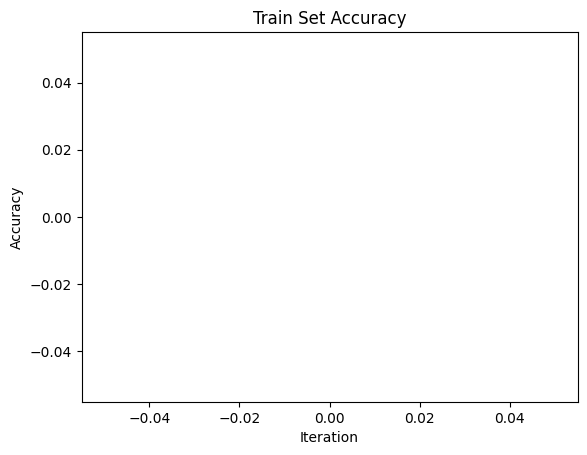

In [248]:
import matplotlib.pyplot as plt

# Plot Loss
fig = plt.figure(facecolor="w")
plt.plot(acc_hist)
plt.title("Train Set Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()

In [249]:
spk_rec = forward_pass(net, data)

AttributeError: module 'torchvision.datasets' has no attribute 'reset'

The target label is: 1


NameError: name 'spk_rec' is not defined

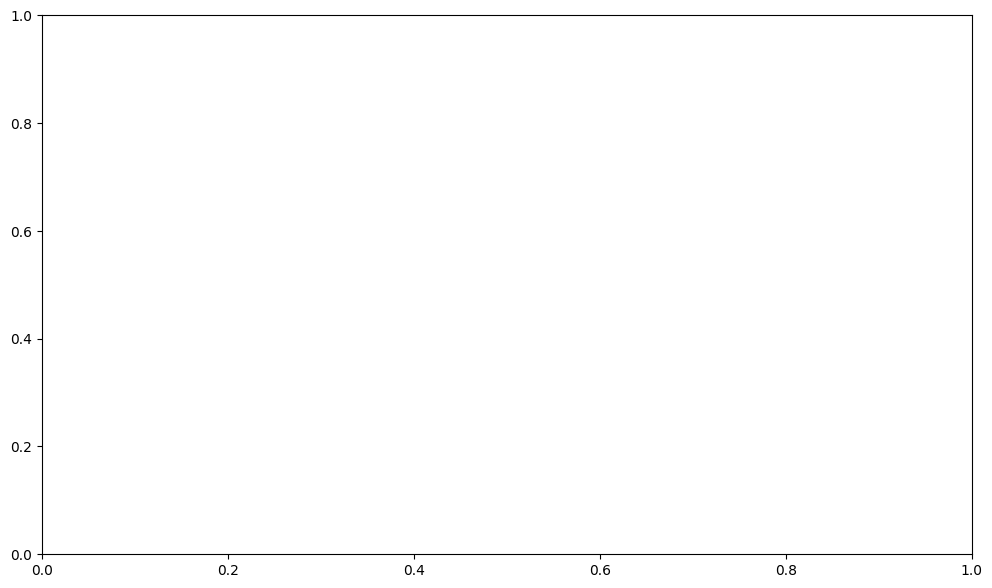

In [250]:
from IPython.display import HTML

idx = 0

fig, ax = plt.subplots(facecolor='w', figsize=(12, 7))
labels=['0', '1', '2', '3', '4', '5', '6', '7', '8','9']
print(f"The target label is: {targets[idx]}")

# plt.rcParams['animation.ffmpeg_path'] = 'C:\\path\\to\\your\\ffmpeg.exe'

#  Plot spike count histogram
anim = splt.spike_count(spk_rec[:, idx].detach().cpu(), fig, ax, labels=labels,
                        animate=True, interpolate=1)

HTML(anim.to_html5_video())
# anim.save("spike_bar.mp4")

In [251]:
loss_val = loss_fn(spk_rec, targets)

print(f"The loss from an untrained network is {loss_val.item():.3f}")

NameError: name 'spk_rec' is not defined